In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import time
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("../Study_Hopsking\data_corregida.csv")
data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,DateTime,RealPower,mes,verano,primavera,otoño,invierno,...,Hora,minute,TotalCampusLoad_ant,OnCampusGeneration_ant,SDG&E Import_ant,AdjustedDemand_ant,temp_ant,Hay_Sol_ant,Prom_hora_mes_dia_ant,mayor_promedio_dia_ant
0,0,0,0.0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,...,23.0,45.0,28844.49,28651.752,192.735,-3111.513,10.0,0.0,38.70800,0.0
1,1,1,1.0,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,...,23.0,30.0,29295.08,29066.792,228.283,-2660.925,10.0,0.0,38.70800,0.0
2,2,2,2.0,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,...,23.0,15.0,28629.41,28455.610,173.804,-3326.586,10.0,0.0,38.70800,1.0
3,3,3,3.0,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,...,23.0,0.0,28208.62,28111.096,97.523,-3747.381,10.0,0.0,38.70800,1.0
4,4,4,4.0,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,...,22.0,45.0,28319.85,28075.003,244.849,-3636.148,10.0,0.0,38.52375,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26301,26301,26301,26295.0,2019-04-02 02:00:00,50.577,4.0,0.0,1.0,0.0,0.0,...,2.0,0.0,34347.36,32166.948,2180.410,2391.358,16.1,0.0,50.89250,1.0
26302,26302,26302,26296.0,2019-04-02 01:45:00,50.491,4.0,0.0,1.0,0.0,0.0,...,1.0,45.0,34530.94,31978.992,2551.960,2574.952,16.1,0.0,51.36100,0.0
26303,26303,26303,26297.0,2019-04-02 01:30:00,50.654,4.0,0.0,1.0,0.0,0.0,...,1.0,30.0,34455.23,32079.000,2376.240,2499.240,16.1,0.0,51.36100,1.0
26304,26304,26304,26298.0,2019-04-02 01:15:00,51.219,4.0,0.0,1.0,0.0,0.0,...,1.0,15.0,34894.43,32140.741,2753.700,2938.441,16.1,0.0,51.36100,1.0


In [3]:
from datetime import datetime

data['timestamp_numeric'] = data['DateTime'].apply(lambda x: int(datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp()))

data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,DateTime,RealPower,mes,verano,primavera,otoño,invierno,...,minute,TotalCampusLoad_ant,OnCampusGeneration_ant,SDG&E Import_ant,AdjustedDemand_ant,temp_ant,Hay_Sol_ant,Prom_hora_mes_dia_ant,mayor_promedio_dia_ant,timestamp_numeric
0,0,0,0.0,2019-12-31 23:45:00,38.394,12.0,0.0,0.0,0.0,1.0,...,45.0,28844.49,28651.752,192.735,-3111.513,10.0,0.0,38.70800,0.0,1577861100
1,1,1,1.0,2019-12-31 23:30:00,38.619,12.0,0.0,0.0,0.0,1.0,...,30.0,29295.08,29066.792,228.283,-2660.925,10.0,0.0,38.70800,0.0,1577860200
2,2,2,2.0,2019-12-31 23:15:00,38.577,12.0,0.0,0.0,0.0,1.0,...,15.0,28629.41,28455.610,173.804,-3326.586,10.0,0.0,38.70800,1.0,1577859300
3,3,3,3.0,2019-12-31 23:00:00,38.493,12.0,0.0,0.0,0.0,1.0,...,0.0,28208.62,28111.096,97.523,-3747.381,10.0,0.0,38.70800,1.0,1577858400
4,4,4,4.0,2019-12-31 22:45:00,38.313,12.0,0.0,0.0,0.0,1.0,...,45.0,28319.85,28075.003,244.849,-3636.148,10.0,0.0,38.52375,1.0,1577857500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26301,26301,26301,26295.0,2019-04-02 02:00:00,50.577,4.0,0.0,1.0,0.0,0.0,...,0.0,34347.36,32166.948,2180.410,2391.358,16.1,0.0,50.89250,1.0,1554192000
26302,26302,26302,26296.0,2019-04-02 01:45:00,50.491,4.0,0.0,1.0,0.0,0.0,...,45.0,34530.94,31978.992,2551.960,2574.952,16.1,0.0,51.36100,0.0,1554191100
26303,26303,26303,26297.0,2019-04-02 01:30:00,50.654,4.0,0.0,1.0,0.0,0.0,...,30.0,34455.23,32079.000,2376.240,2499.240,16.1,0.0,51.36100,1.0,1554190200
26304,26304,26304,26298.0,2019-04-02 01:15:00,51.219,4.0,0.0,1.0,0.0,0.0,...,15.0,34894.43,32140.741,2753.700,2938.441,16.1,0.0,51.36100,1.0,1554189300


In [5]:
data["temp_ant"].describe()

count    26306.000000
mean        10.168546
std         86.695586
min       -999.900000
25%         15.560000
50%         17.800000
75%         20.000000
max         34.400000
Name: temp_ant, dtype: float64

In [7]:
data = data[data['temp_ant'] >= 0]
data = data[data['RealPower'] >= 0]
data.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,RealPower,mes,verano,primavera,otoño,invierno,dia,...,minute,TotalCampusLoad_ant,OnCampusGeneration_ant,SDG&E Import_ant,AdjustedDemand_ant,temp_ant,Hay_Sol_ant,Prom_hora_mes_dia_ant,mayor_promedio_dia_ant,timestamp_numeric
count,26113.000000,26113.000000,26113.000000,26113.000000,26113.000000,26113.000000,26113.000000,26113.000000,26113.000000,26113.000000,...,26113.000000,26113.000000,26113.000000,26113.000000,26113.000000,26113.000000,26113.0,26113.000000,26113.000000,2.611300e+04
mean,13206.205798,13206.205798,13202.619462,48.302038,8.004519,0.338261,0.220465,0.327308,0.113966,15.835140,...,22.499713,34921.376788,29070.965868,5850.637260,2965.603128,17.594680,0.0,48.302138,0.563283,1.565976e+09
std,7596.143945,7596.143945,7594.385812,5.726037,2.573070,0.473127,0.414568,0.469240,0.317776,8.731737,...,16.771602,3439.433539,4604.846558,5713.151129,3439.430280,3.842784,0.0,5.493713,0.495989,6.836013e+06
min,0.000000,0.000000,0.000000,8.410000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,26852.870000,2370.419000,-2250.200000,-5103.138000,5.000000,0.0,24.301250,0.000000,1.554188e+09
25%,6720.000000,6720.000000,6716.000000,45.860000,6.000000,0.000000,0.000000,0.000000,0.000000,8.000000,...,0.000000,32278.550000,29776.409000,1647.793000,322.558000,15.560000,0.0,46.120250,0.000000,1.560063e+09
50%,13249.000000,13249.000000,13245.000000,48.315000,8.000000,0.000000,0.000000,0.000000,0.000000,16.000000,...,15.000000,34436.440000,30397.822000,4375.990000,2480.680000,17.800000,0.0,48.311750,1.000000,1.565937e+09
75%,19777.000000,19777.000000,19772.000000,51.784000,10.000000,1.000000,0.000000,1.000000,0.000000,23.000000,...,45.000000,37026.460000,31201.928000,7820.320000,5070.464000,20.000000,0.0,51.824250,1.000000,1.571813e+09
max,26305.000000,26305.000000,26299.000000,82.339000,12.000000,1.000000,1.000000,1.000000,1.000000,31.000000,...,45.000000,51437.470000,33593.590000,35281.610000,19481.464000,34.400000,0.0,75.317750,1.000000,1.577861e+09


In [8]:
total_filas = data.shape[0]

porcentaje_entrenamiento = 0.8

# Calcula el número de filas para entrenamiento y prueba
num_filas_entrenamiento = int(total_filas * porcentaje_entrenamiento)
num_filas_prueba = total_filas - num_filas_entrenamiento

# Divide los datos
X_train = data[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol_ant", "temp_ant", 
                "timestamp_numeric","minute","Hora","Prom_hora_mes","mayor_promedio", "Prom_hora_mes_dia_ant", "mayor_promedio_dia_ant",
                "TotalCampusLoad_ant","OnCampusGeneration_ant","SDG&E Import_ant", "AdjustedDemand_ant"]][:num_filas_entrenamiento]
Y_train = data["RealPower"][:num_filas_entrenamiento]
X_test = data[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol_ant", "temp_ant", 
               "timestamp_numeric","minute","Hora","Prom_hora_mes","mayor_promedio",  "Prom_hora_mes_dia_ant", "mayor_promedio_dia_ant",
               "TotalCampusLoad_ant","OnCampusGeneration_ant","SDG&E Import_ant", "AdjustedDemand_ant"]][num_filas_entrenamiento:]
Y_test = data["RealPower"][num_filas_entrenamiento:]

print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)


Train set: (20890, 21) (20890,)
Test set: (5223, 21) (5223,)


In [9]:
X_train_array = X_train.to_numpy()
Y_train_array = Y_train.to_numpy()

# Creating a DataFrame from the NumPy arrays
df = pd.DataFrame({
    "mes": X_train_array[:, 0],
    "verano": X_train_array[:, 1],
    "primavera": X_train_array[:, 2],
    "otoño": X_train_array[:, 3],
    "invierno": X_train_array[:, 4],
    "dia": X_train_array[:, 5],
    "vacaciones": X_train_array[:, 6],
    "clases_verano": X_train_array[:, 7],
    "Hay_Sol_ant": X_train_array[:, 8],
    "temp_ant": X_train_array[:, 9],
    "timestamp_numeric": X_train_array[:, 10],
    "minute": X_train_array[:, 11],
    "Hora": X_train_array[:, 12],
    "Prom_hora_mes": X_train_array[:, 13],
    "mayor_promedio": X_train_array[:, 14],
    "TotalCampusLoad_ant": X_train_array[:, 15],
    "OnCampusGeneration_ant": X_train_array[:, 16],
    "SDG&E Import_ant": X_train_array[:, 17],
    "AdjustedDemand_ant": X_train_array[:, 18],
    "Prom_hora_mes_dia_ant": X_train_array[:, 19],
    "mayor_promedio_dia_ant": X_train_array[:, 20],

    "RealPower": Y_train_array.flatten()
})

In [11]:
s1=MinMaxScaler(feature_range=(-1,1))
Xs=s1.fit_transform(df[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol_ant", "temp_ant", 
                        "timestamp_numeric","minute","Hora","Prom_hora_mes","mayor_promedio", "Prom_hora_mes_dia_ant", "mayor_promedio_dia_ant",
                        "TotalCampusLoad_ant","OnCampusGeneration_ant","SDG&E Import_ant", "AdjustedDemand_ant"]])

s2=MinMaxScaler(feature_range=(-1,1))
Ys=s2.fit_transform(df[["RealPower"]])

In [12]:
window=96
X=[]
Y=[]
for i in range(window, len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])
X,Y=np.array(X), np.array(Y)


In [13]:
model=Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 21)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error",
              metrics=["accuracy", ])

es=EarlyStopping(monitor="loss", mode="min",
                 verbose=1, patience=10)

t0=time.time()

history=model.fit(X,Y,epochs=10,batch_size=250,
                  callbacks=[es], verbose=1)

t1=time.time()

print("Runtime:%.2f s" % (t1-t0))

Epoch 1/10
84/84 [==============================] - 61s 580ms/step - loss: 0.0133 - accuracy: 0.0000e+00
Epoch 2/10
84/84 [==============================] - 47s 554ms/step - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 3/10
84/84 [==============================] - 50s 594ms/step - loss: 0.0054 - accuracy: 4.8091e-05
Epoch 4/10
84/84 [==============================] - 45s 530ms/step - loss: 0.0046 - accuracy: 4.8091e-05
Epoch 5/10
84/84 [==============================] - 44s 525ms/step - loss: 0.0043 - accuracy: 4.8091e-05
Epoch 6/10
84/84 [==============================] - 49s 588ms/step - loss: 0.0039 - accuracy: 4.8091e-05
Epoch 7/10
84/84 [==============================] - 54s 640ms/step - loss: 0.0037 - accuracy: 4.8091e-05
Epoch 8/10
84/84 [==============================] - 55s 654ms/step - loss: 0.0035 - accuracy: 4.8091e-05
Epoch 9/10
84/84 [==============================] - 65s 779ms/step - loss: 0.0035 - accuracy: 4.8091e-05
Epoch 10/10
84/84 [==============================] - 57

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


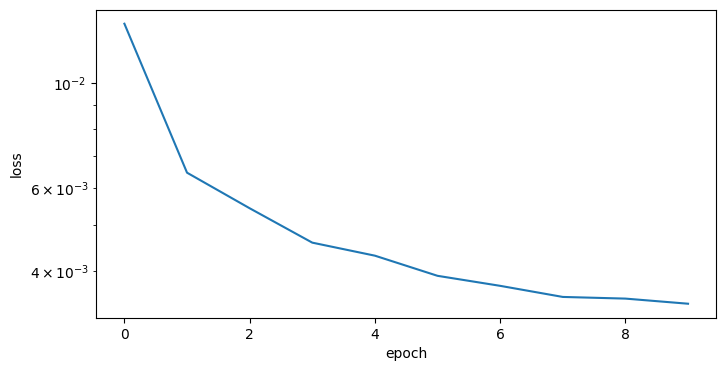

In [14]:
plt.figure(figsize=(8,4))
plt.semilogy(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
model.save("model")

In [15]:
Yp=model.predict(X)

Yu=s2.inverse_transform(Yp)
Ym=s2.inverse_transform(Y)

650/650 [==============================] - 33s 46ms/step


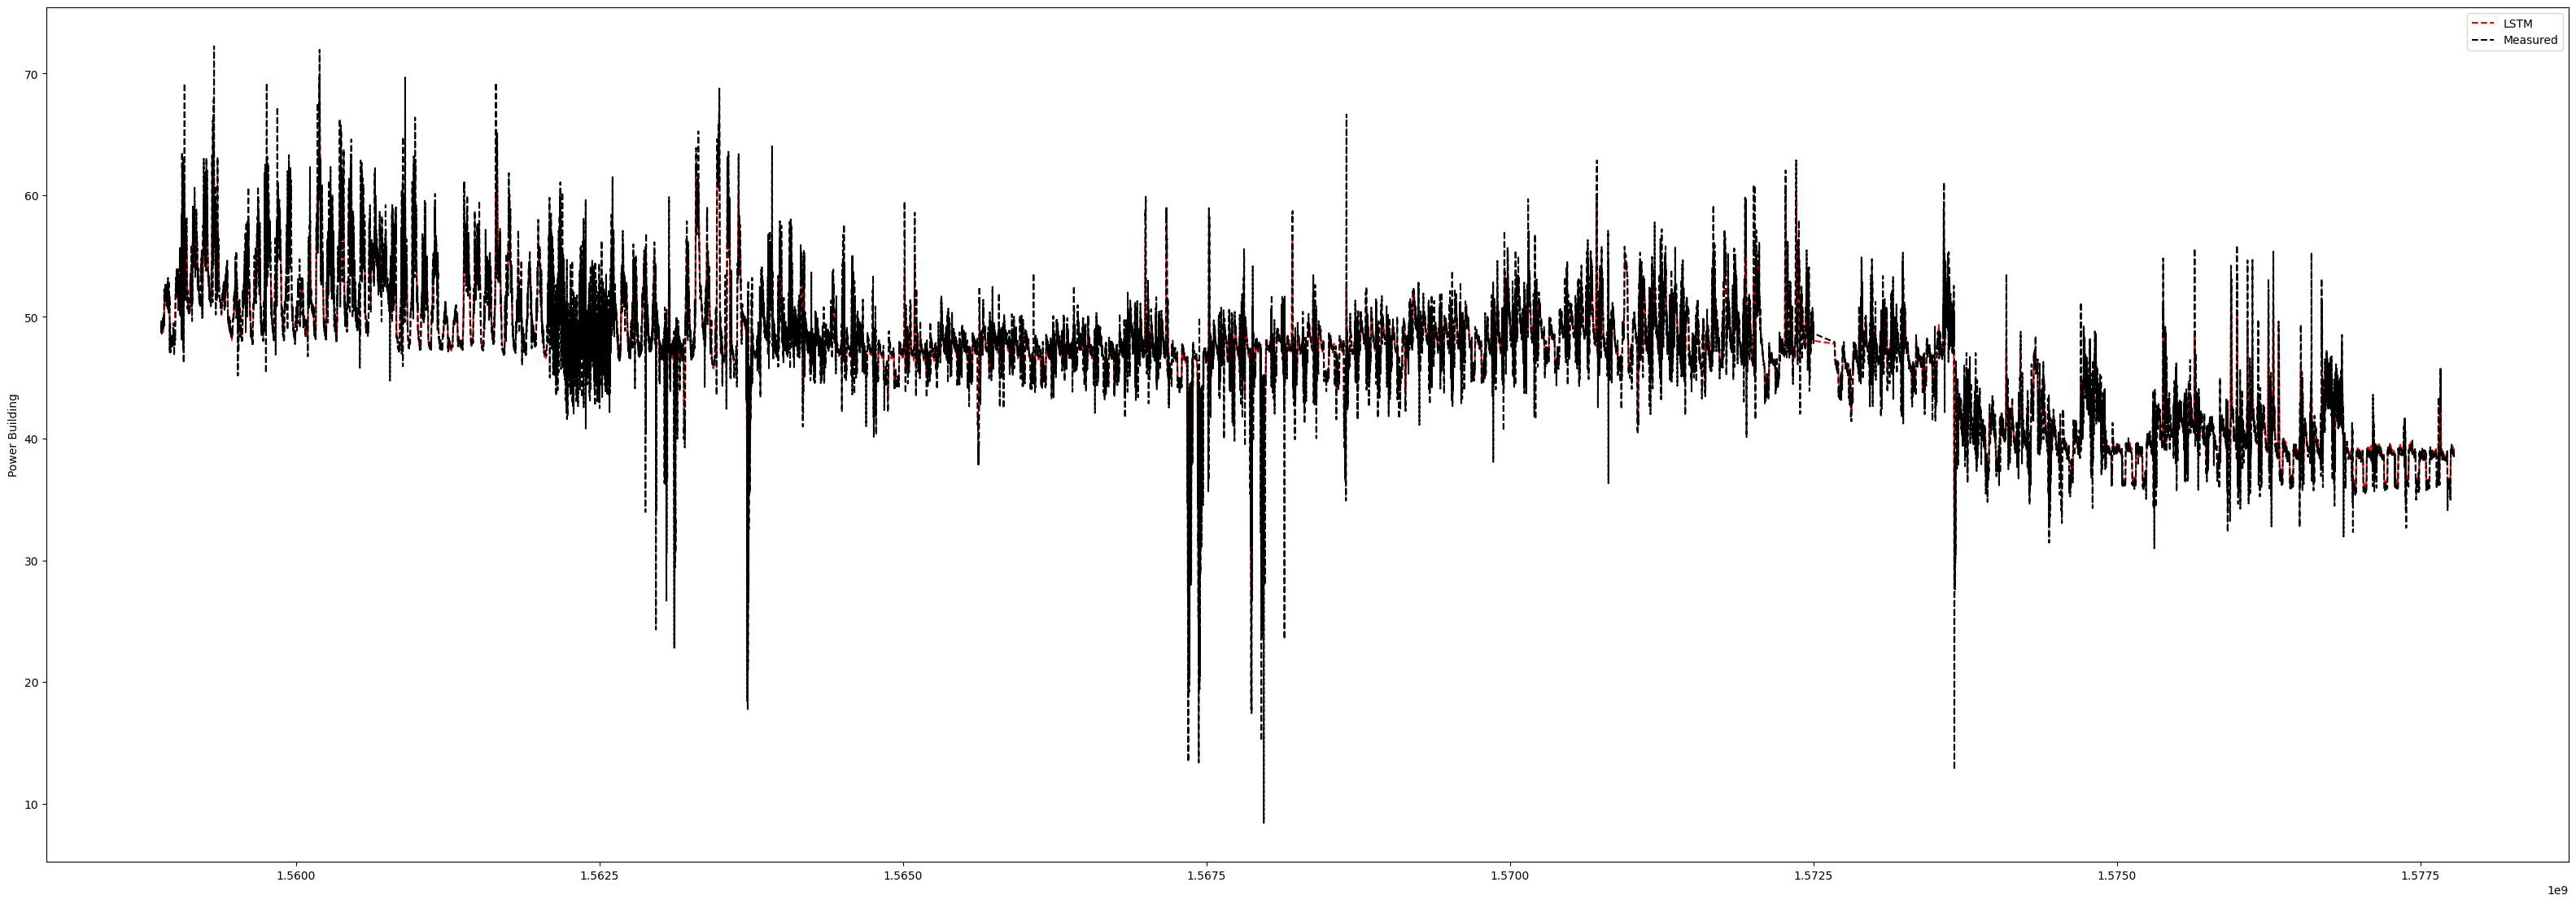

In [16]:
plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot(df["timestamp_numeric"][window:], Yu, "r--", label="LSTM")
plt.plot(df["timestamp_numeric"][window:], Ym, "k--", label="Measured")
plt.ylabel("Power Building")
plt.legend()

In [17]:
v=load_model("model")

X_test_array = X_test.to_numpy()
Y_test_array = Y_test.to_numpy()

test = pd.DataFrame({
    "mes": X_test_array[:, 0],
    "verano": X_test_array[:, 1],
    "primavera": X_test_array[:, 2],
    "otoño": X_test_array[:, 3],
    "invierno": X_test_array[:, 4],
    "dia": X_test_array[:, 5],
    "vacaciones": X_test_array[:, 6],
    "clases_verano": X_test_array[:, 7],
    "Hay_Sol_ant": X_test_array[:, 8],
    "temp_ant": X_test_array[:, 9],
    "timestamp_numeric": X_test_array[:, 10],
    "minute": X_test_array[:, 11],
    "Hora": X_test_array[:, 12],
    "Prom_hora_mes": X_test_array[:, 13],
    "mayor_promedio": X_test_array[:, 14],
    "TotalCampusLoad_ant": X_test_array[:, 15],
    "OnCampusGeneration_ant": X_test_array[:, 16],
    "SDG&E Import_ant": X_test_array[:, 17],
    "AdjustedDemand_ant": X_test_array[:, 18],
    "Prom_hora_mes_dia_ant": X_test_array[:, 19],
    "mayor_promedio_dia_ant": X_test_array[:, 20],

    "RealPower": Y_test_array.flatten()
})

In [18]:
Xt=test[["mes", "verano", "primavera", "otoño", "invierno", "dia", "vacaciones", "clases_verano", "Hay_Sol_ant", "temp_ant", 
         "timestamp_numeric","minute","Hora","Prom_hora_mes","mayor_promedio",  "Prom_hora_mes_dia_ant", "mayor_promedio_dia_ant",
         "TotalCampusLoad_ant","OnCampusGeneration_ant","SDG&E Import_ant", "AdjustedDemand_ant"]].values

Yt=test[["RealPower"]].values

In [19]:
Xts=s1.transform(Xt)
Yts=s2.transform(Yt)

C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\giuliana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [20]:
Yti=[]
Xti=[]

for i in range(window, len (Xts)):
    Xti.append(Xts[i-window:i,:])
    Yti.append(Yts[i])

Xti,Yti=np.array(Xti), np.array(Yti)

In [21]:
Ytp=model.predict(Xti)

Ytu=s2.inverse_transform(Ytp)
Ytm=s2.inverse_transform(Yti)

161/161 [==============================] - 7s 43ms/step


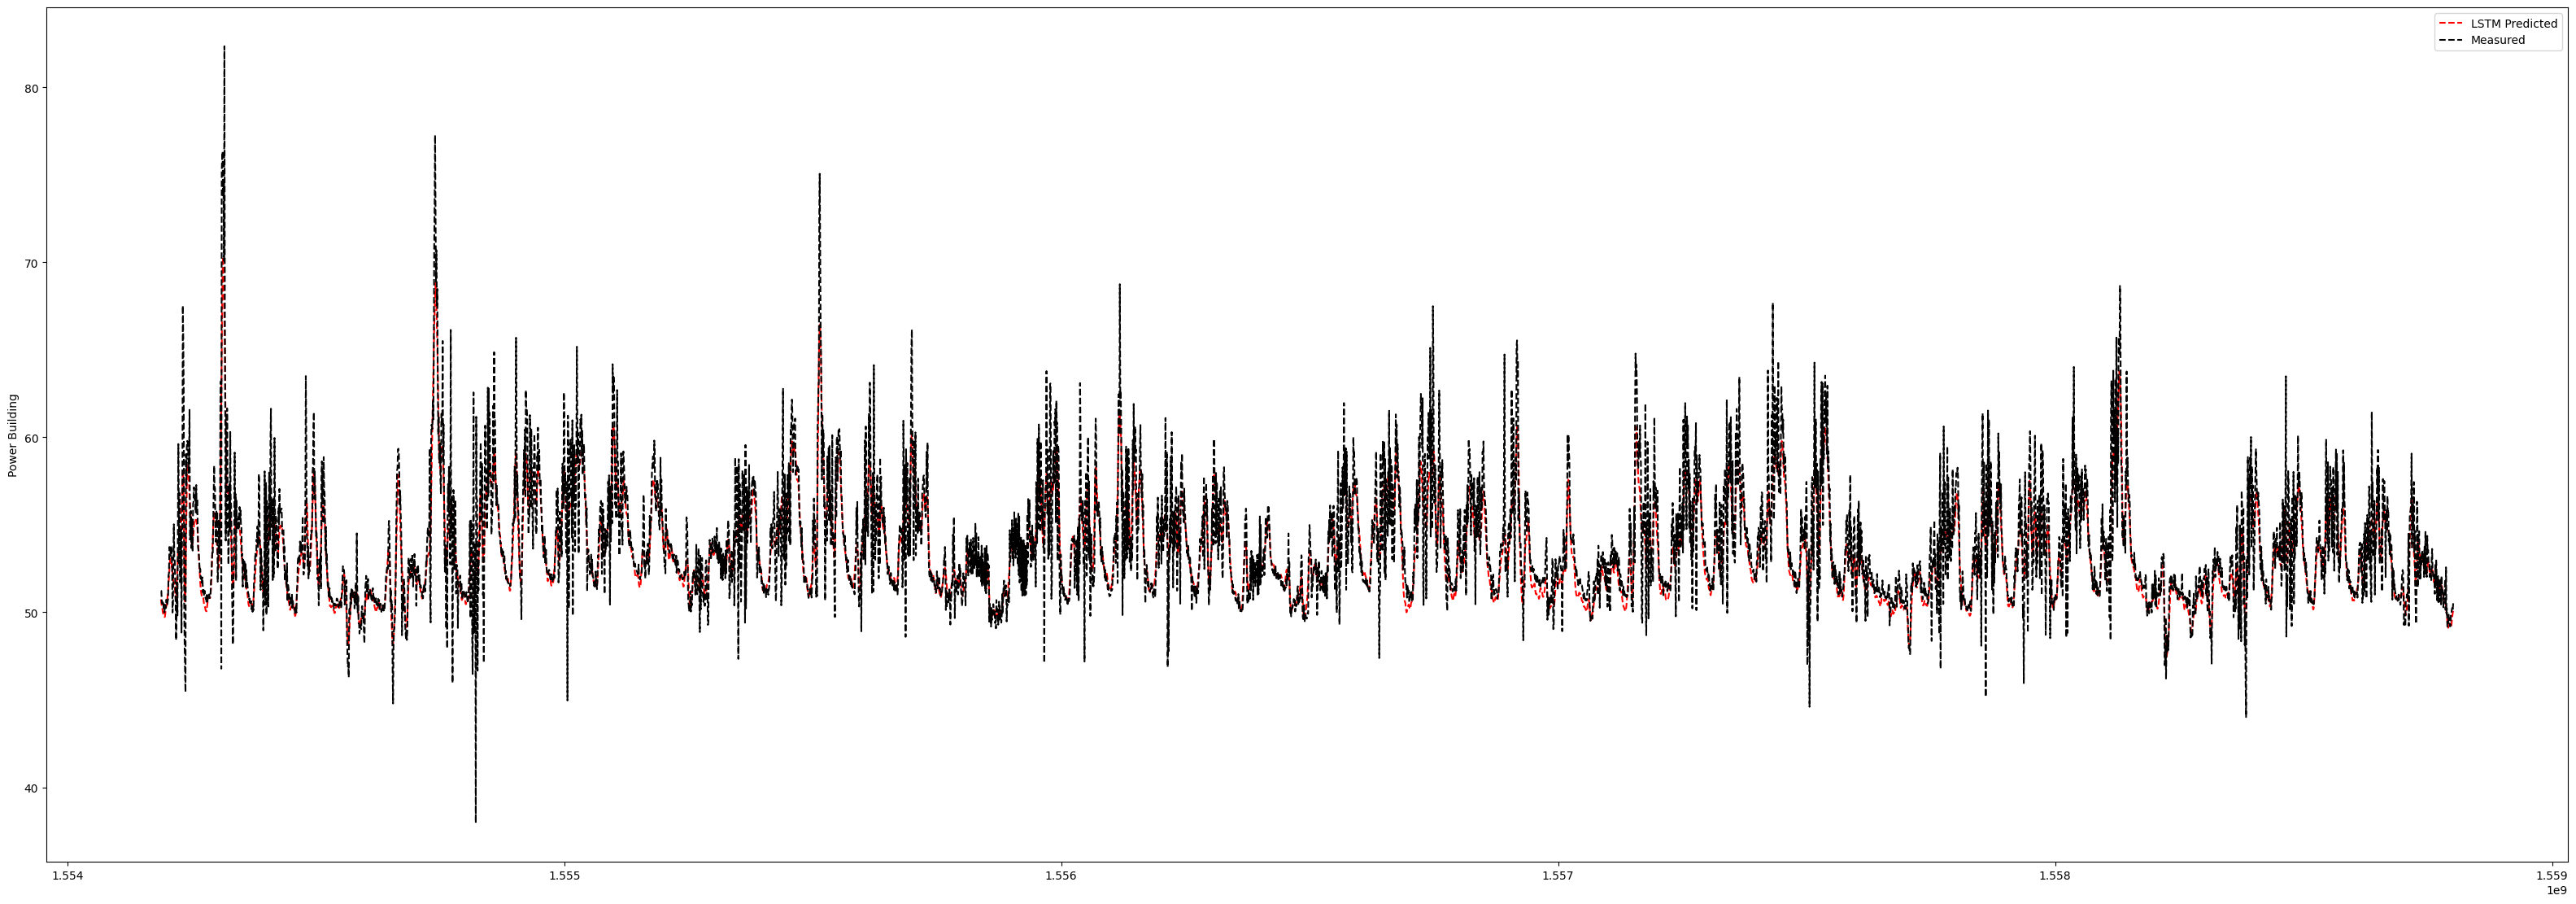

In [22]:
plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot(test["timestamp_numeric"][window:], Ytu, "r--", label="LSTM Predicted")
plt.plot(test["timestamp_numeric"][window:], Ytm, "k--", label="Measured")
plt.ylabel("Power Building")
plt.legend()

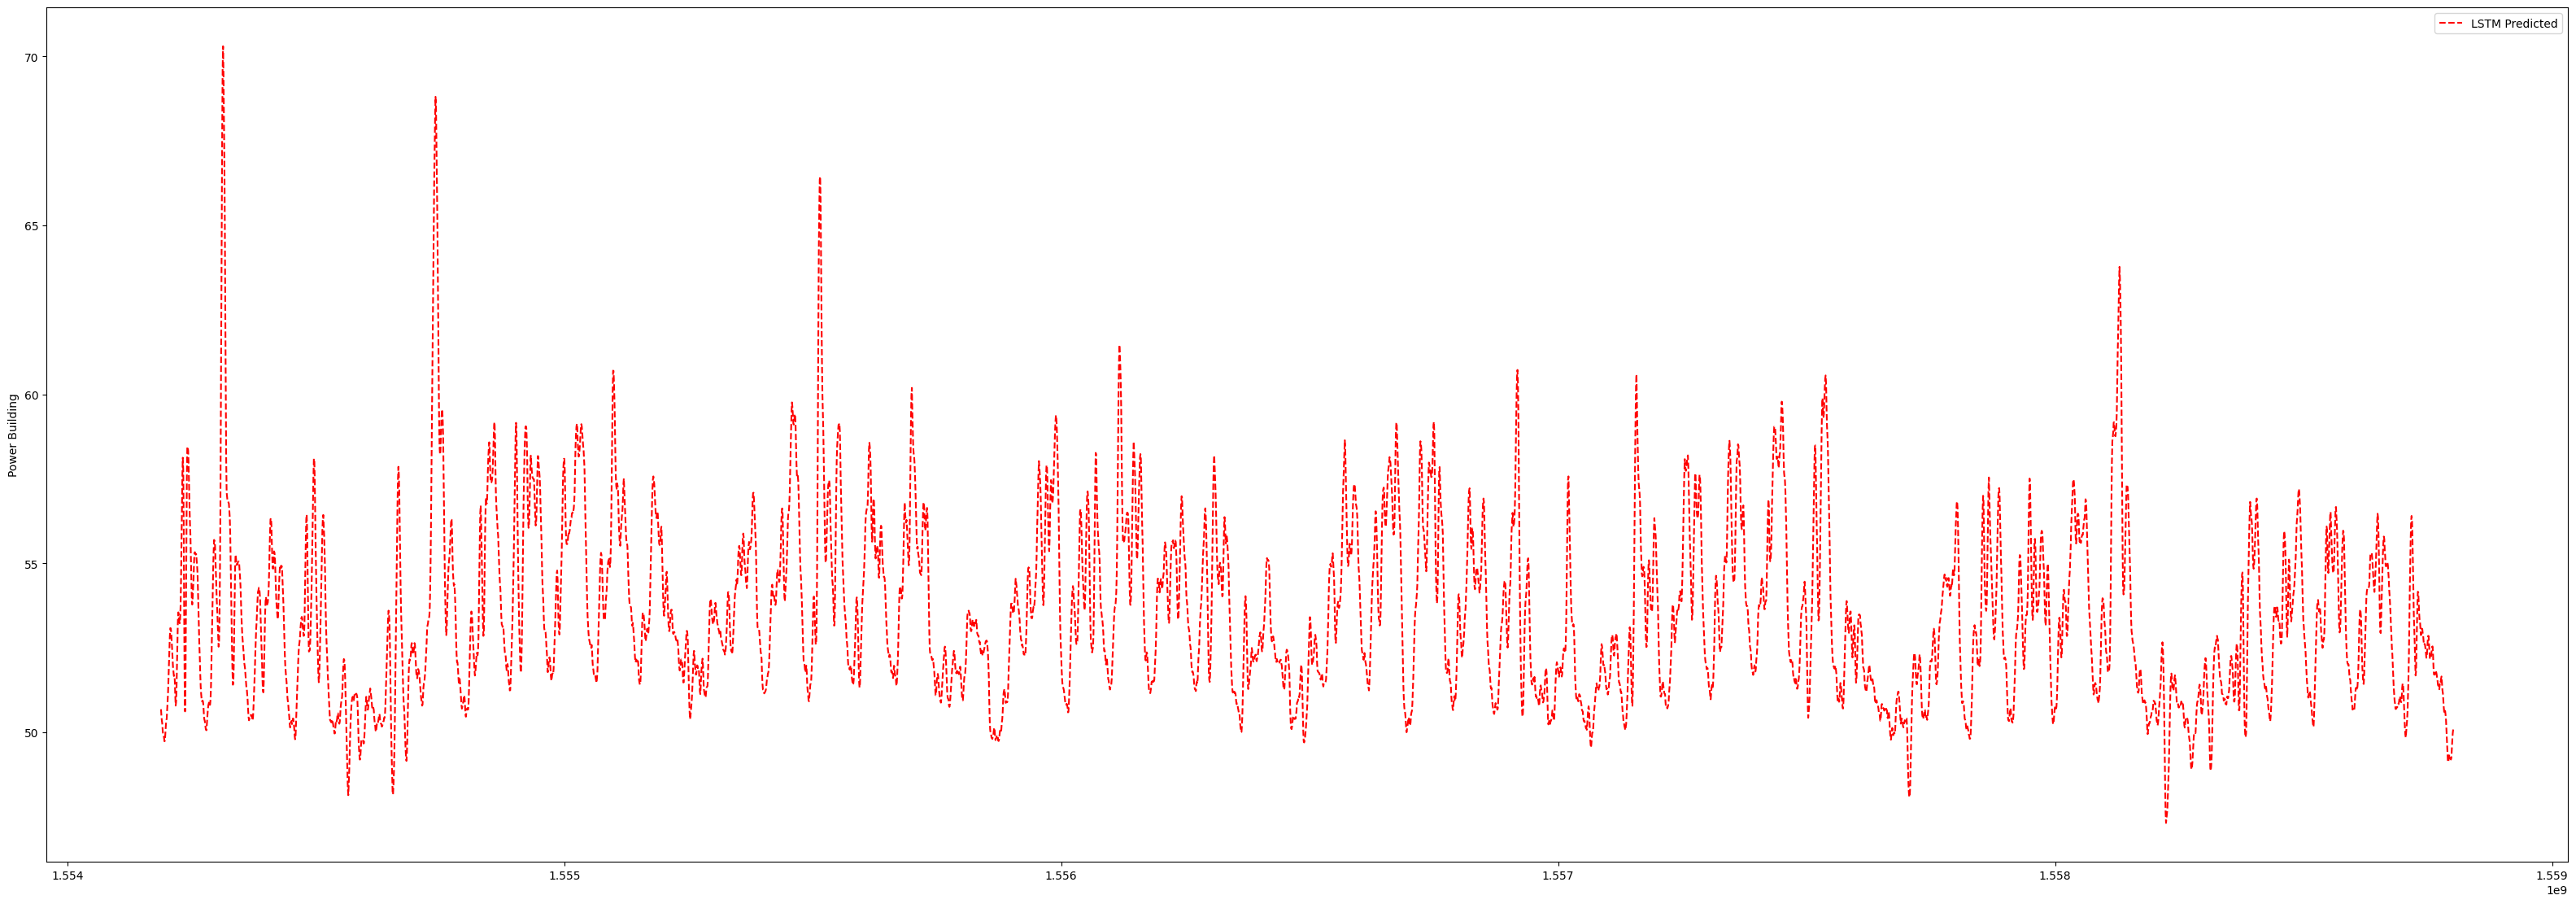

In [23]:
plt.figure(figsize=(40,30))
plt.subplot(2,1,1)
plt.plot(test["timestamp_numeric"][window:], Ytu, "r--", label="LSTM Predicted")
plt.ylabel("Power Building")
plt.legend()